# Section 1


### By Antanas and Ryley

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
data = pd.read_csv('tsa_claims1.csv')
data.head()

C:\Users\themr\AppData\Local\Temp\ipykernel_7364\274973986.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('tsa_claims1.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
2,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
3,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
4,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle


In [120]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94848 entries, 0 to 94847
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Claim Number   94848 non-null  object 
 1   Date Received  94848 non-null  object 
 2   Incident Date  94848 non-null  object 
 3   Airport Code   94848 non-null  object 
 4   Airport Name   94848 non-null  object 
 5   Airline Name   94848 non-null  object 
 6   Claim Type     94848 non-null  object 
 7   Claim Site     94848 non-null  object 
 8   Item           94848 non-null  object 
 9   Claim Amount   94848 non-null  float64
 10  Status         94848 non-null  object 
 11  Close Amount   94848 non-null  float64
 12  Disposition    94848 non-null  object 
dtypes: float64(2), object(11)
memory usage: 9.4+ MB


In [122]:
data = data.drop(columns=['Close Amount', 'Disposition', 'Airline Name', 'Airport Code', 'Incident Date', 'Item', 'Date Received'])
data.head()

,Claim Number,Airport Name,Claim Type,Claim Site,Claim Amount,Status
0,0909802M,Newark International Airport,Property Damage,Checkpoint,350.00,Approved
1,0202445M,Lambert St. Louis International,Property Damage,Checked Baggage,278.88,Settled
2,0909816M,Miami International Airport,Property Damage,Checkpoint,50.00,Approved
3,2005032379513,Orlando International Airport,Property Damage,Checkpoint,84.79,Approved
4,2005032479636,Akron-Canton Regional,Passenger Property Loss,Checked Baggage,459.01,Settled


In [124]:
data.nunique()

Claim Number    94848
Airport Name      411
Claim Type          6
Claim Site          4
Claim Amount    27013
Status              5
dtype: int64

<Axes: xlabel='Claim Type'>

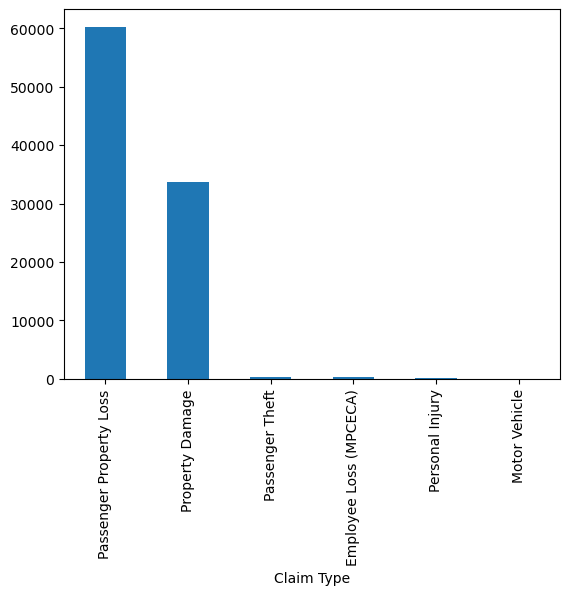

In [126]:
claim_counts = data['Claim Type'].value_counts()
claim_counts.plot(kind='bar')

## Passenger Property Loss is the most common insurance claim type


<Axes: xlabel='Claim Site'>

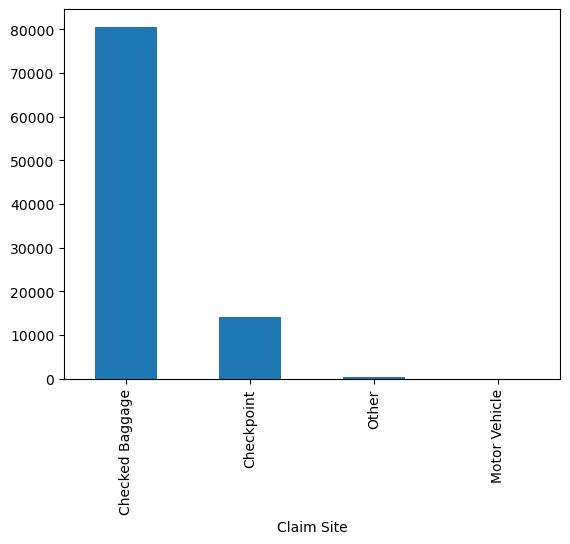

In [129]:
Site_counts = data['Claim Site'].value_counts()
Site_counts.plot(kind='bar')

## Checked Baggage is the most common site for claims

In [10]:
claimlocales = data.groupby(['Claim Type', 'Claim Site']).size().reset_index(name= 'Count')
claimlocalesgraph = sns.barplot(data=claimlocales, x='Claim Type', y='Count', hue='Claim Site')

plt.xticks(rotation=90)
plt.show()



NameError: name 'data' is not defined

## Employee Loss = Checked Baggage, Motor vehicle = N/A, Passenger Property Loss = Checked Baggage, Passenger Theft = Checked Baggage, Personal Injury = Checked Baggage, Propery Damage = Checked Baggage

In [135]:
Mean = data[['Claim Amount']].mean()

In [137]:
Mean

Claim Amount    3634.830998
dtype: float64

## The average claim amount is $3634.83

<Axes: ylabel='count'>

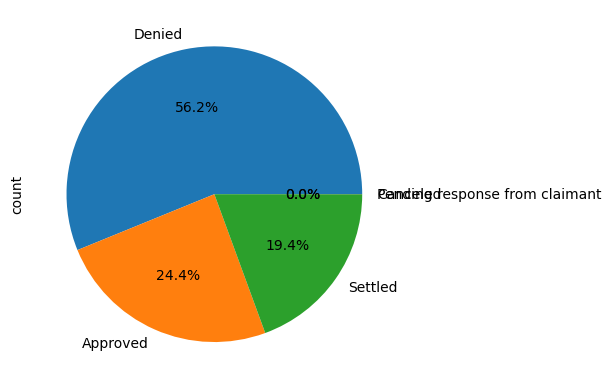

In [140]:
claim_counts = data['Status'].value_counts()
claim_counts.plot(kind='pie', autopct='%1.1f%%')


## the overall claim approval rate is 24.4%

### By Antans and Ryley

# SECTION 2

In [176]:
data2 = pd.read_csv('tsa_claims2.csv')
data2.head()

C:\Users\themr\AppData\Local\Temp\ipykernel_7364\3546493294.py:1: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('tsa_claims2.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [180]:
def convert_money(value):
    if isinstance(value, str):
        value = (value.replace('$', ''). replace(',', ''))
        try:
            return float(value)
        except ValueError:
            return None
        return None

data2['Claim Amount'] = data2['Claim Amount'].apply(convert_money)
data2['Close Amount'] = data2['Close Amount'].apply(convert_money)

In [182]:
data2.dropna(inplace=True)

In [184]:
float_value = data2.select_dtypes(include=['float'])

In [186]:
date_value = data2.select_dtypes(include=['datetime'])

In [201]:
approved = data2[data2['Status'].isin(['Approved', 'Settled'])].copy()
approved = data2[data2['Claim Amount'].notna() & (approved['Claim Amount'] != 0)].copy()
approved['prentage_paid'] = (approved['Close Amount'] / approved['Claim Amount']) * 100
approved.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,prentage_paid
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full,100.000000
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle,81.726908
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,100.000000
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full,100.000000
5,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle,49.454260


In [203]:
meanpaid = approved['prentage_paid'].mean()

In [205]:
print(meanpaid)

79.98959975518603


## On average they pay about 80% of the claim amount

In [223]:
airport_counts = data['Airport Name'].value_counts()
airport_counts.head()


Airport Name
Los Angeles International Airport       4492
John F. Kennedy International           3835
Chicago O'Hare International Airport    3620
Newark International Airport            3594
Miami International Airport             2986
Name: count, dtype: int64

## The Airports with the most claims are above 

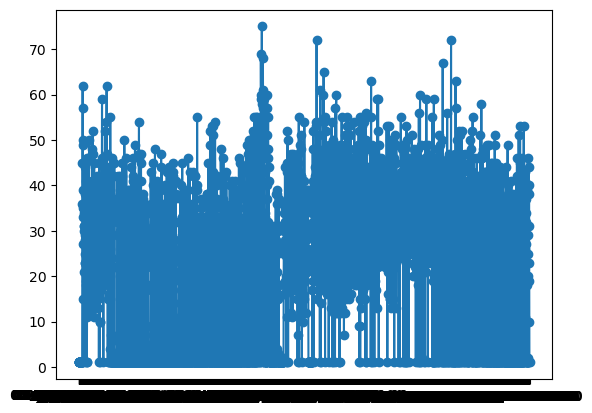

In [228]:
incident_counts = data2['Incident Date'].value_counts().sort_index()
plt.plot(incident_counts.index, incident_counts.values, marker='o')
plt.show

## The amount of claims closed has fluxuated over time but has not significantly went up or down

## I believe there was an error in the instructions regarding the question "Has the total close amount increased or decreased over time?" as it doesnt make logical sense to ask however, the answer to the question is that it increased as there is only more money being closed/given